#Análise dos dados - Canal Sora, me ajuda!

##Carregamento dos dados e primeiros tratamentos

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("dados_sora_gerais.csv")
df

,Conteúdo,Título do vídeo,Horário de publicação do vídeo,Visualizações,Tempo de exibição (horas),Inscritos,Receita estimada (USD),Duração média da visualização,Impressões,Taxa de cliques de impressões (%)
0,Total,NaN,NaN,1468505.0,95494.6759,27774.0,1403.599,0:03:54,10535202,7.24
1,5HcB0SSNLrE,"Gêneros Literários - Épico, Lírico e Narrativo","Mar 6, 2017",166788.0,12381.0585,3795.0,126.238,0:04:27,971402,9.15
2,-jM9G7g4Z4g,Sujeito e Predicado - Termos Essenciais da Oração,"Dec 3, 2019",150080.0,13591.8207,2383.0,27.600,0:05:26,750953,13.30
3,XBLv1QvDkeo,Planeje aulas criativas com Google Jamboard - ...,"Mar 25, 2020",129083.0,11632.7026,3519.0,243.896,0:05:24,1163297,3.89
4,z3ItpRxNZyc,Complementos e Ag. da passiva - Termos Integra...,"Dec 4, 2019",84533.0,6867.8245,1371.0,111.258,0:04:52,580345,10.28
...,...,...,...,...,...,...,...,...,...,...
270,gtmPk8d-8ZA,Coesão e coerência,NaN,2.0,0.0035,0.0,NaN,0:00:06,24,0.00
271,zMvpelMpYI4,Do micro ao macro: da sala de aula invertida à...,NaN,2.0,0.0048,0.0,NaN,0:00:08,8,0.00
272,bGrRwDrmz7w,"Trabalho de Fundamentos do ensino de ciências,...",NaN,1.0,0.0030,0.0,NaN,0:00:10,0,NaN
273,omvc-2jYEMI,Sua ÚLTIMA chance de fazer algo concreto pela ...,NaN,0.0,0.0000,0.0,NaN,NaN,372,0.00


A coluna de conteúdo não nos diz muito, então vamos retirá-la, juntamente com a primeira linha, que é uma linha de totais

In [ ]:
df = df.drop(columns='Conteúdo')
df = df.drop(df.index[0])

Preencheremos algumas das colunas como valor da mediana dessas colunas e a coluna de data de publicação será preenchida com a data mais comum.

In [ ]:
# Converter a coluna 'Duração média da visualização' para timedelta
df['Duração média da visualização'] = pd.to_timedelta(df['Duração média da visualização'], errors='coerce')

# Extraindo os minutos
df['Duração média da visualização'] = df['Duração média da visualização'].dt.total_seconds() / 60

# Calcular a média
media_duracao = df['Duração média da visualização'].mean()

# Preencher valores nulos com a média
df['Duração média da visualização'].fillna(pd.to_timedelta(media_duracao), inplace=True)


In [ ]:
# Lista de colunas a serem preenchidas
colunas_para_preencher = ['Visualizações', 'Tempo de exibição (horas)','Duração média da visualização', 'Inscritos', 'Receita estimada (USD)', 'Taxa de cliques de impressões (%)']

# Preencher valores nulos nas colunas especificadas com a mediana
df[colunas_para_preencher] = df[colunas_para_preencher].fillna(df[colunas_para_preencher].median())

<ipython-input-5-627268ac0853>:5: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df[colunas_para_preencher] = df[colunas_para_preencher].fillna(df[colunas_para_preencher].median())


In [ ]:
from datetime import datetime

# Supondo que 'df' seja o seu DataFrame e a coluna seja chamada 'data_column'
# Convert the column to datetime format
#['Horário de publicação do vídeo'] = pd.to_datetime(df['Horário de publicação do vídeo'])
df['Horário de publicação do vídeo'] = pd.to_datetime(df['Horário de publicação do vídeo'], format='%b %d, %Y', errors='coerce')

# Substituir valores nulos pela data mais comum
data_mais_comum = df['Horário de publicação do vídeo'].mode().iloc[0]
df['Horário de publicação do vídeo'].fillna(data_mais_comum, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274 entries, 1 to 274
Data columns (total 9 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Título do vídeo                    274 non-null    object        
 1   Horário de publicação do vídeo     274 non-null    datetime64[ns]
 2   Visualizações                      274 non-null    float64       
 3   Tempo de exibição (horas)          274 non-null    float64       
 4   Inscritos                          274 non-null    float64       
 5   Receita estimada (USD)             274 non-null    float64       
 6   Duração média da visualização      274 non-null    object        
 7   Impressões                         274 non-null    int64         
 8   Taxa de cliques de impressões (%)  274 non-null    float64       
dtypes: datetime64[ns](1), float64(5), int64(1), object(2)
memory usage: 19.4+ KB


Por fim, renomeamos a coluna de horário de publicação do vídeo

In [ ]:
df.rename(columns={'Horário de publicação do vídeo': 'Data de publicação'},inplace = True)

##Vídeos com mais visualizações

In [ ]:
mais_visto = df.groupby('Título do vídeo'). agg({'Visualizações':'sum'})
mais_visto = mais_visto.reset_index()
mais_visto = mais_visto.sort_values(by='Visualizações',ascending = False)
mais_visto.head(10)

,Título do vídeo,Visualizações
125,"Gêneros Literários - Épico, Lírico e Narrativo",166788.0
230,Sujeito e Predicado - Termos Essenciais da Oração,150080.0
186,Planeje aulas criativas com Google Jamboard - ...,129083.0
66,Complementos e Ag. da passiva - Termos Integra...,84533.0
111,"Figuras de Linguagem (Metáfora, Metonímia, Hip...",68063.0
95,Elementos da Narrativa: definições e tipos,66012.0
8,"Adjuntos, Vocativo e Aposto - Termos Acessório...",60957.0
246,Texto literário e não literário - Característi...,50211.0
200,Prosódia e Ortoépia - Explicação e Exemplos,34988.0
166,"Notícia e reportagem: diferenças, semelhanças ...",33941.0


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Tamanho de fonte das legendas
font = 20

# Criar um DataFrame para o gráfico
df_plot = mais_visto.head(10).copy()

# Ajustar o estilo do seaborn
sns.set(style="whitegrid")

# Ajuste global do tamanho da fonte antes de criar a figura
plt.rcParams.update({'font.size': font})  # Ajuste o valor conforme necessário

# Escolher uma paleta de cores mais neutras, mas distintas (Set2)
colors = sns.color_palette("Set2", n_colors=len(df_plot['Título do vídeo'].unique()))

# Criar o gráfico de barras
plt.figure(figsize=(30,8), dpi=600)  # Ajuste a resolução conforme necessário

# Barplot usando seaborn
sns.barplot(x='Título do vídeo', y='Visualizações', hue='Título do vídeo', data=df_plot, palette=colors, width=0.7, dodge=False)

# Ajustar o título e os rótulos
# Ajustar o título e os rótulos com tamanho de fonte especificado
plt.xlabel('', fontsize=font)
plt.ylabel('', fontsize=font, labelpad=40)
plt.title('')

# Remover ticks do eixo x
plt.xticks([])

# Rotacionar os rótulos do eixo x para melhor legibilidade
plt.xticks(rotation=0, ha='center', fontsize=font)  # Ajuste o tamanho da fonte conforme necessário
plt.yticks(rotation=0, ha='right', fontsize=23)  # Ajuste o tamanho da fonte conforme necessário

# Mostrar a legenda fora do gráfico para melhor visualização
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=5)  # Ajuste o tamanho da fonte conforme necessário
plt.legend(bbox_to_anchor=(1.05, 1),loc='upper left',fontsize= 20)  # Ajuste o tamanho da fonte conforme necessário

# Ajustar o layout para evitar cortes no rótulo do eixo x
plt.tight_layout()

# Mostrar o gráfico
plt.show()


##Relação dos vídeos com as receitas trazidas

In [ ]:
video_receita = df.groupby('Título do vídeo'). agg({'Data de publicação':'unique','Receita estimada (USD)':'sum', 'Visualizações': 'sum'})
video_receita = video_receita.reset_index()
video_receita = video_receita.sort_values(by='Receita estimada (USD)',ascending = False)
pd.set_option('display.max_rows', 264)
video_receita

,Título do vídeo,Data de publicação,Receita estimada (USD),Visualizações
186,Planeje aulas criativas com Google Jamboard - ...,[2020-03-25T00:00:00.000000000],243.896,129083.0
125,"Gêneros Literários - Épico, Lírico e Narrativo",[2017-03-06T00:00:00.000000000],126.238,166788.0
66,Complementos e Ag. da passiva - Termos Integra...,[2019-12-04T00:00:00.000000000],111.258,84533.0
95,Elementos da Narrativa: definições e tipos,[2020-11-04T00:00:00.000000000],76.817,66012.0
8,"Adjuntos, Vocativo e Aposto - Termos Acessório...",[2019-12-05T00:00:00.000000000],67.548,60957.0
...,...,...,...,...
91,Diálogo x debate,[2023-07-11T00:00:00.000000000],0.001,57.0
203,Quem é a Luana?,[2022-05-19T00:00:00.000000000],0.000,331.0
264,Você pode estar usando errado o verbo IMPLICAR,[2022-07-14T00:00:00.000000000],0.000,143.0
3,5 Dicas para melhorar sua ortografia,[2022-07-13T00:00:00.000000000],0.000,200.0


É possível perceber que o vídeo com mais visualizações não necessariamente gera mais receita. A receita no YouTube está relacionada à publicidade, e nem todos os espectadores geram receita. Fatores como o tipo de público, localização geográfica, o uso de bloqueadores de anúncios e a taxa de cliques em anúncios impactam a receita, enquanto as visualizações representam apenas a quantidade de vezes que o vídeo foi assistido.


Veremos como foi a evolução da receita ao longo do tempo, nos focando em vídeos que geraram ao menos 1 dólar de receita.

In [ ]:
video_receita = video_receita[video_receita['Receita estimada (USD)'] >= 1.000]

In [ ]:
video_receita.shape

(89, 4)

In [ ]:
# Crie uma nova coluna 'mes_ano' no DataFrame
df['mes_ano'] = df['Data de publicação'].dt.to_period('M')

In [ ]:
# Converter a coluna 'mes_ano' para o formato string
df['mes_ano_str'] = df['mes_ano'].astype(str)

In [ ]:
df = df.sort_values(by="mes_ano_str",ascending = True)

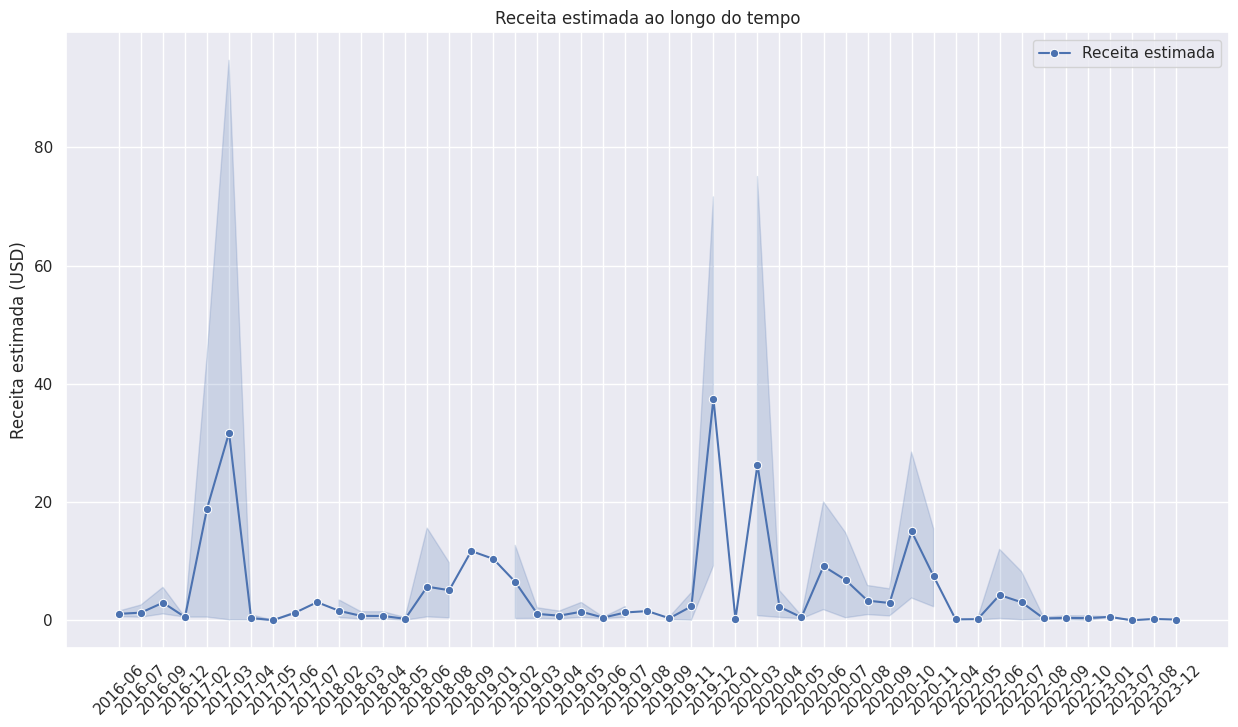

In [ ]:
# Converter a coluna 'Horário de publicação do vídeo' para o formato datetime64
#df['Data de publicação'] = pd.to_datetime(df['Data de publicação'], errors='coerce')

# Configurar o tema do Seaborn
sns.set_theme(style="darkgrid")

# Criar o gráfico de linha
plt.figure(figsize=(15, 8))
sns.lineplot(x='mes_ano_str', y='Receita estimada (USD)', data=df, marker='o', label='Receita estimada')

# Adicionar rótulos e título
plt.xlabel('')
plt.ylabel('Receita estimada (USD)')
plt.title('Receita estimada ao longo do tempo')

# Girar os rótulos do eixo x para melhor legibilidade
plt.xticks(rotation=45)

# Mostrar a legenda
plt.legend()

# Mostrar o gráfico
plt.show()

Percebe-se que há diversos picos e vales, com os maiores picos ocorrendo no fim de 2019 e início de 2020 (próximo ao início da quarentena da pandemia), possivelmente pelos acessos provindos de estudantes buscando auxílio durante a pandemia. Também vemos que dos 274 vídeos do canal, 89 faturaram ao menos 1 dólar.

Veremos agora se há alguma relação com as datas de maior publicação.

In [ ]:
video_data = df.copy()

In [ ]:
# Crie uma nova coluna 'mes_ano' no DataFrame
video_data['mes_ano'] = video_data['Data de publicação'].dt.to_period('M')

In [ ]:
freq_post = video_data.groupby('mes_ano').agg({'Inscritos':'sum','Título do vídeo': 'count','Receita estimada (USD)':'sum', 'Visualizações':'sum'})
freq_post = freq_post.reset_index()
freq_post = freq_post.sort_values(by='mes_ano',ascending = True)
freq_post

,mes_ano,Inscritos,Título do vídeo,Receita estimada (USD),Visualizações
0,2016-06,30.0,2,2.178,6883.0
1,2016-07,190.0,24,31.099,28978.0
2,2016-09,207.0,7,20.854,32634.0
3,2016-12,68.0,2,1.088,11565.0
4,2017-02,1673.0,3,56.661,89138.0
5,2017-03,3807.0,4,126.881,167913.0
6,2017-04,48.0,3,1.168,2307.0
7,2017-05,0.0,2,0.034,202.0
8,2017-06,62.0,2,2.566,5317.0
9,2017-07,68.0,1,3.063,5319.0


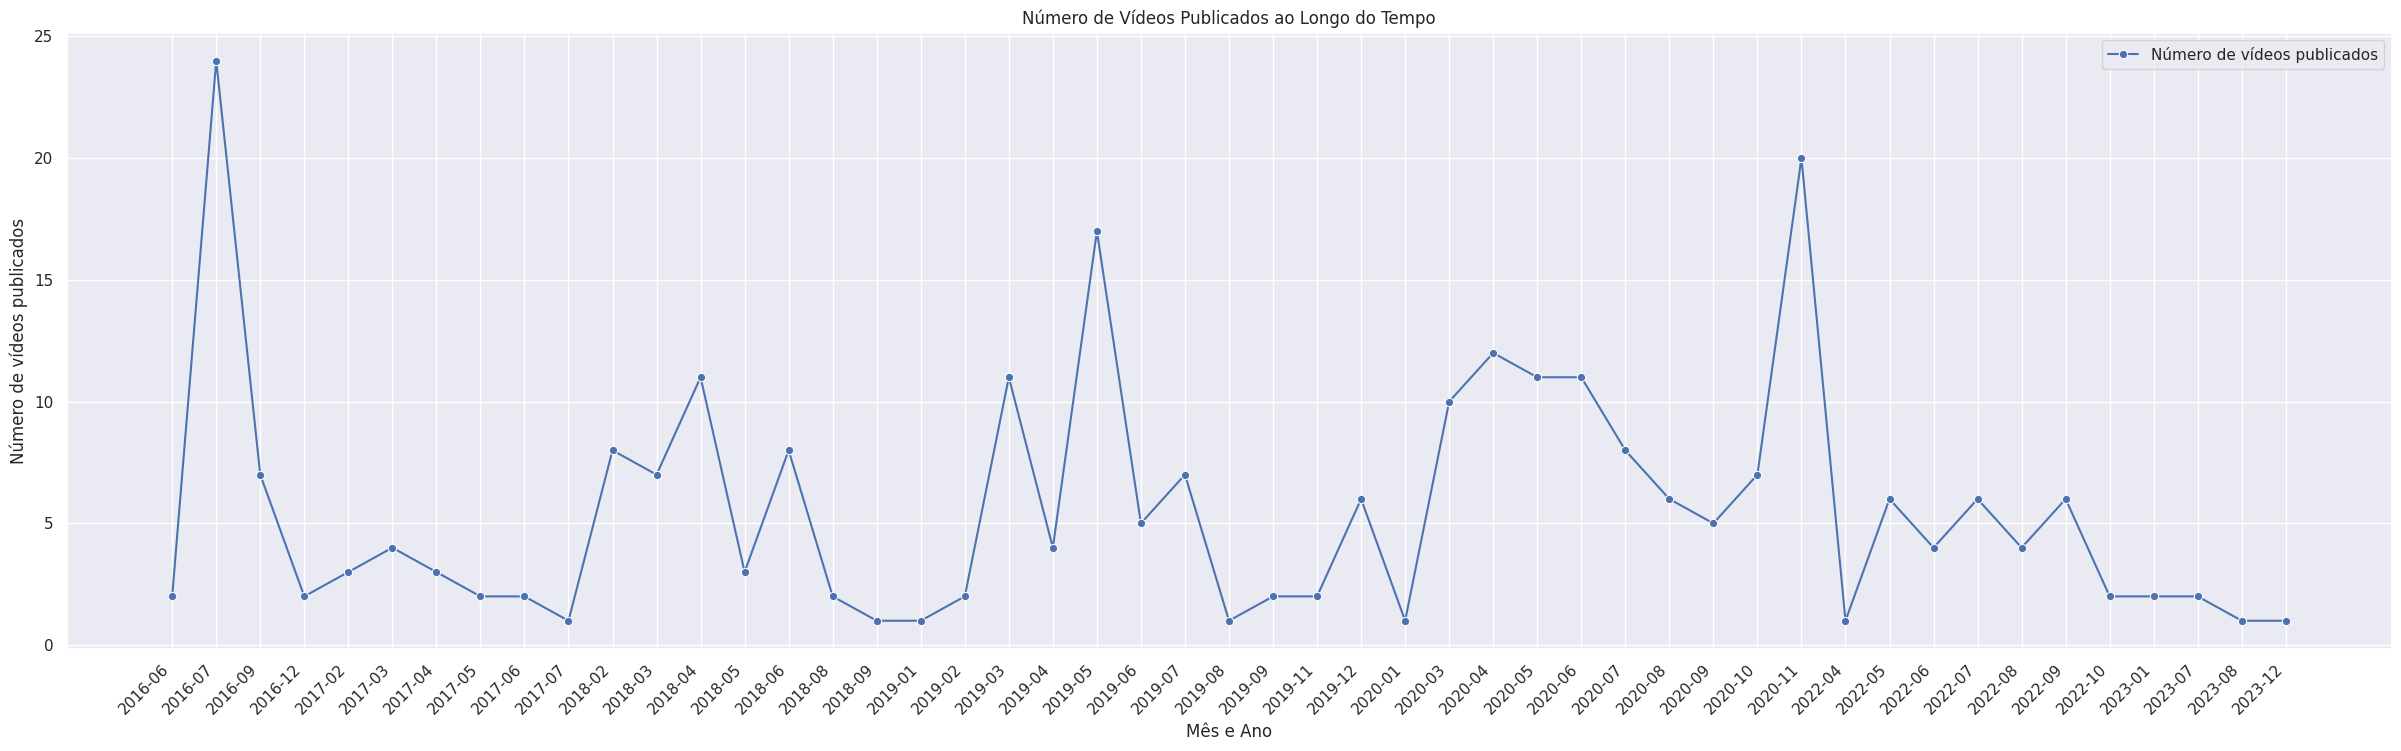

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Converter a coluna 'mes_ano' para o formato string
freq_post['mes_ano_str'] = freq_post['mes_ano'].astype(str)

# Configurar o tema do Seaborn
sns.set_theme(style="darkgrid")

# Criar o gráfico de linha
plt.figure(figsize=(30, 8))
sns.lineplot(x='mes_ano_str', y='Título do vídeo', data=freq_post, marker='o', label='Número de vídeos publicados')

# Adicionar rótulos e título
plt.xlabel('Mês e Ano')
plt.ylabel('Número de vídeos publicados')
plt.title('Número de Vídeos Publicados ao Longo do Tempo')

# Formatando os rótulos do eixo x para melhor legibilidade (opcional)
plt.xticks(rotation=45, ha='right')

# Adicionar legenda
plt.legend()

# Adicionar grade para melhorar a leitura
plt.grid(True)

# Mostrar o gráfico
plt.show()

Vê-se que o canal passa por diversos picos e vales de produção, sendo que a frequência de postagens vista no período de maior rendimento de receita, já havia sido vista, não trazendo, no entanto, o mesmo rendimento. Isso leva a crer que a pandemia foi um fator importante para a receita do canal.

##Vídeos mais exibidos e com maior número de impressões

In [ ]:
mais_exibidos = df.sort_values(by=['Tempo de exibição (horas)'],ascending = False)
mais_exibidos.head(30)

,Título do vídeo,Data de publicação,Visualizações,Tempo de exibição (horas),Inscritos,Receita estimada (USD),Duração média da visualização,Impressões,Taxa de cliques de impressões (%),mes_ano,mes_ano_str
2,Sujeito e Predicado - Termos Essenciais da Oração,2019-12-03,150080.0,13591.8207,2383.0,27.600,5.433333,750953,13.30,2019-12,2019-12
1,"Gêneros Literários - Épico, Lírico e Narrativo",2017-03-06,166788.0,12381.0585,3795.0,126.238,4.45,971402,9.15,2017-03,2017-03
3,Planeje aulas criativas com Google Jamboard - ...,2020-03-25,129083.0,11632.7026,3519.0,243.896,5.4,1163297,3.89,2020-03,2020-03
4,Complementos e Ag. da passiva - Termos Integra...,2019-12-04,84533.0,6867.8245,1371.0,111.258,4.866667,580345,10.28,2019-12,2019-12
6,Elementos da Narrativa: definições e tipos,2020-11-04,66012.0,5054.3298,1065.0,76.817,4.583333,576610,7.67,2020-11,2020-11
7,"Adjuntos, Vocativo e Aposto - Termos Acessório...",2019-12-05,60957.0,3844.2103,1199.0,67.548,3.783333,384276,11.16,2019-12,2019-12
5,"Figuras de Linguagem (Metáfora, Metonímia, Hip...",2017-02-14,68063.0,3708.9043,1121.0,44.582,3.266667,461745,6.87,2017-02,2017-02
10,"Notícia e reportagem: diferenças, semelhanças ...",2020-06-08,33941.0,2554.2104,483.0,54.067,4.5,259667,5.12,2020-06,2020-06
8,Texto literário e não literário - Característi...,2018-08-08,50211.0,1742.2516,683.0,9.755,2.066667,299324,10.88,2018-08,2018-08
9,Prosódia e Ortoépia - Explicação e Exemplos,2018-06-07,34988.0,1637.5648,643.0,40.254,2.8,205642,11.38,2018-06,2018-06


In [ ]:
mais_exibidos['Título do vídeo'].head(10)

2     Sujeito e Predicado - Termos Essenciais da Oração
1        Gêneros Literários - Épico, Lírico e Narrativo
3     Planeje aulas criativas com Google Jamboard - ...
4     Complementos e Ag. da passiva - Termos Integra...
6            Elementos da Narrativa: definições e tipos
7     Adjuntos, Vocativo e Aposto - Termos Acessório...
5     Figuras de Linguagem (Metáfora, Metonímia, Hip...
10    Notícia e reportagem: diferenças, semelhanças ...
8     Texto literário e não literário - Característi...
9           Prosódia e Ortoépia - Explicação e Exemplos
Name: Título do vídeo, dtype: object

In [ ]:
mais_exibidos.columns

Index(['Título do vídeo', 'Data de publicação', 'Visualizações',
       'Tempo de exibição (horas)', 'Inscritos', 'Receita estimada (USD)',
       'Duração média da visualização', 'Impressões',
       'Taxa de cliques de impressões (%)', 'mes_ano', 'mes_ano_str'],
      dtype='object')

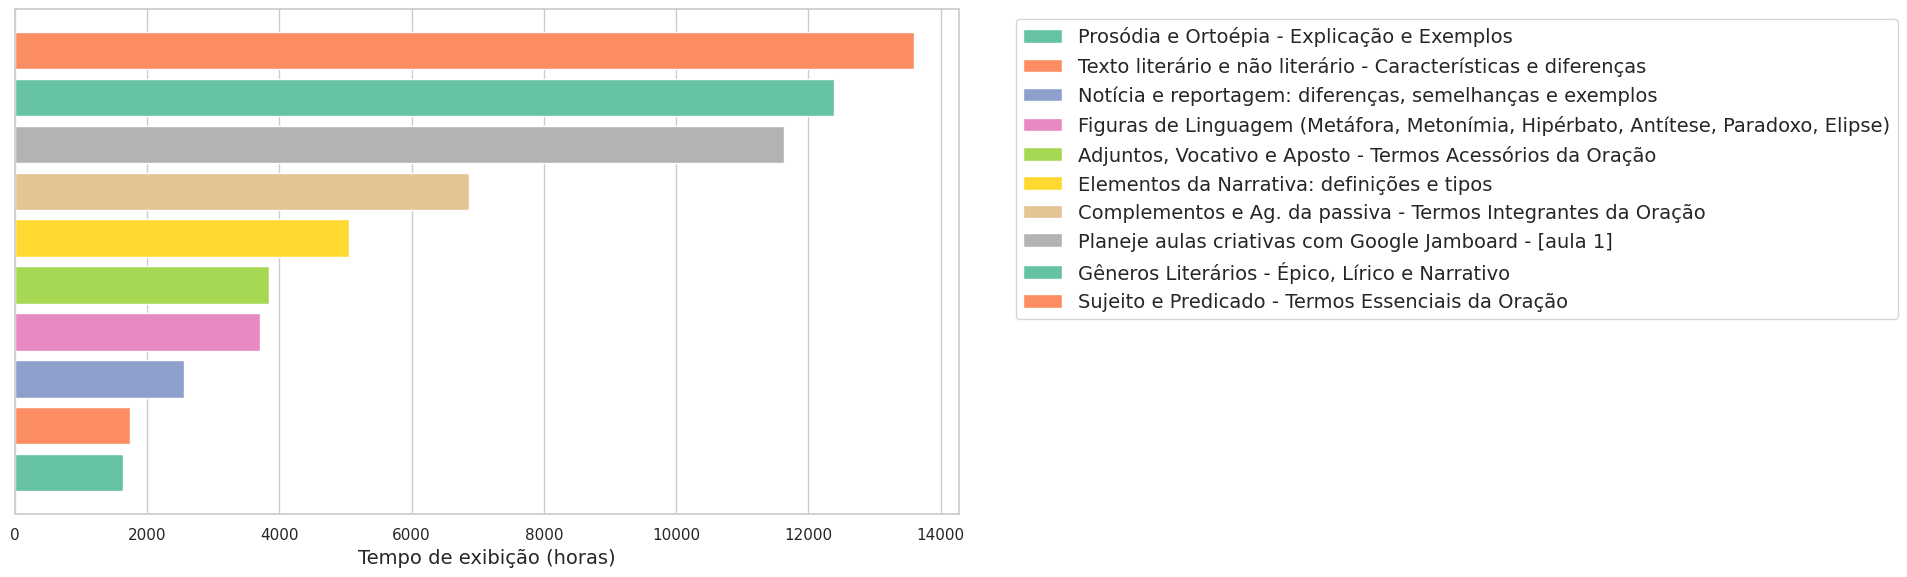

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Tamanho de fonte das legendas
font = 14

# Criar um DataFrame para o gráfico
df_plot_2 = mais_exibidos.head(10).copy()
df_plot_2 = df_plot_2.sort_values(by='Tempo de exibição (horas)',ascending = True)

# Ajustar o estilo do seaborn
sns.set(style="whitegrid")

# Ajuste global do tamanho da fonte antes de criar a figura
plt.rcParams.update({'font.size': font})  # Ajuste o valor conforme necessário

# Escolher uma paleta de cores mais neutras, mas distintas (Set2)
colors = sns.color_palette("Set2", n_colors=len(df_plot_2['Título do vídeo'].unique()))

# Criar o gráfico de barras horizontais com os títulos como legendas
plt.figure(figsize=(10, 6), dpi=100)  # Ajuste a largura e altura conforme necessário

for i, (titulo, tempo) in enumerate(zip(df_plot_2['Título do vídeo'], df_plot_2['Tempo de exibição (horas)'])):
    plt.barh(titulo, tempo, color=colors[i], label=titulo)

# Ajustar o título e os rótulos
plt.xlabel('Tempo de exibição (horas)', fontsize=font)
plt.ylabel('', fontsize=font)
plt.title('', fontsize=font)

# Remover ticks do eixo x
plt.yticks([])

# Ajustar o layout para evitar cortes no rótulo do eixo y
plt.tight_layout()

# Adicionar a legenda fora do gráfico para melhor visualização
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=font)

# Mostrar o gráfico
plt.show()

In [ ]:
mais_impressões = df.sort_values(by=['Impressões'],ascending = False)
mais_impressões['Título do vídeo'].head(30)

3     Planeje aulas criativas com Google Jamboard - ...
1        Gêneros Literários - Épico, Lírico e Narrativo
2     Sujeito e Predicado - Termos Essenciais da Oração
4     Complementos e Ag. da passiva - Termos Integra...
6            Elementos da Narrativa: definições e tipos
5     Figuras de Linguagem (Metáfora, Metonímia, Hip...
7     Adjuntos, Vocativo e Aposto - Termos Acessório...
8     Texto literário e não literário - Característi...
10    Notícia e reportagem: diferenças, semelhanças ...
11    Acesse o Jamboard pelo Google Meet - Tutorial ...
9           Prosódia e Ortoépia - Explicação e Exemplos
13        Prosa, Poema e Poesia - Exemplos e diferenças
15                                Conotação e Denotação
16                   Como analisar e interpretar poemas
14    Tipos de Discurso - Direto, indireto e indiret...
22      Como eu consegui meu 1º emprego como professora
12               Diferença entre Polissemia e Homonímia
35         Escolas literárias - Linha do tempo e

Vídeos com mais impressões, ou seja, que tiveram as miniaturas mais mostradas aos espectadores, não necessariamente são os mais assistidos e não necessariamente trazem mais receita.
Além disso, vídeos com temas voltados a gramática e literatura, em geral performam melhor, com foco no conteúdo do Ensino Fundamental II.

##Análise dos dados de idade

In [ ]:
df_idade = pd.read_csv("idade_views.csv")
df_idade.sort_values(by = ['Idade do espectador','Visualizações (%)'], ascending = False)
df_idade

,Idade do espectador,Visualizações (%),Duração média da visualização,Porcentagem visualizada média (%),Tempo de exibição (horas) (%)
0,13 a 17 anos,10.38,0:03:55,47.40,10.18
1,18 a 24 anos,33.06,0:03:58,44.48,32.86
2,25 a 34 anos,22.46,0:03:57,41.85,22.23
3,35 a 44 anos,21.14,0:04:00,39.44,21.21
4,45 a 54 anos,11.15,0:04:07,38.29,11.48
5,55 a 64 anos,1.77,0:04:34,37.86,2.03
6,A partir de 65 anos,0.04,0:01:46,37.35,0.02


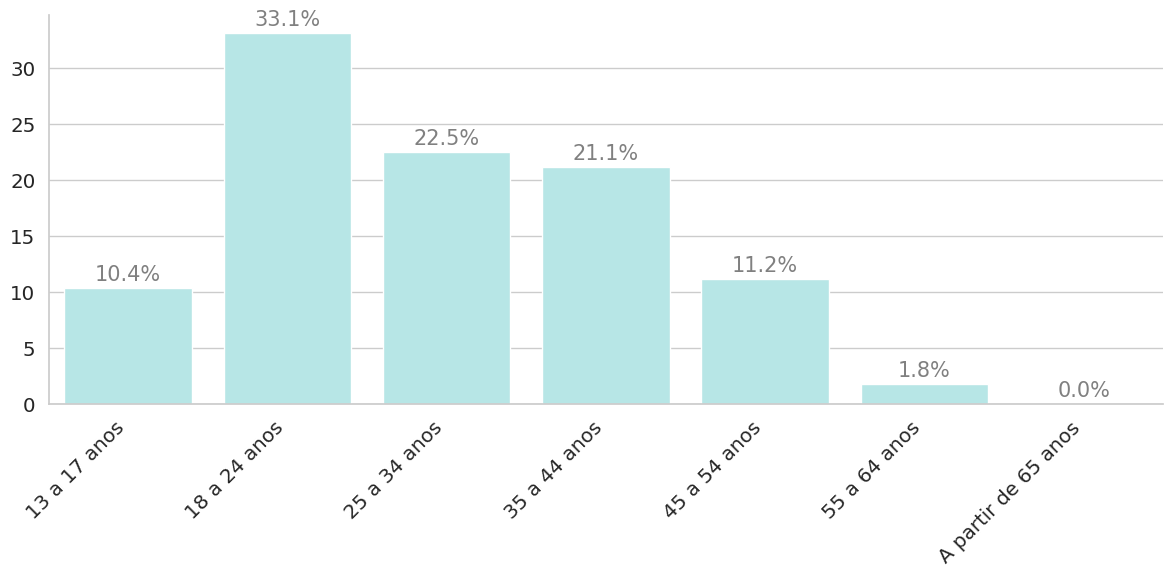

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configurar o tema do Seaborn (opcional, mas melhora a estética)
sns.set_theme(style='whitegrid', font_scale=1.3)

# Escolher uma única cor
gray_color = '#AFEEEE'

# Criar o histograma com uma única cor
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(x='Idade do espectador', y='Visualizações (%)', data=df_idade, color=gray_color)

# Ajustar a rotação dos rótulos do eixo x para melhor legibilidade
bar_plot.set_xticklabels(bar_plot.get_xticklabels(), rotation=45, ha='right')

# Remover bordas desnecessárias
sns.despine()

# Adicionar rótulos e título (se necessário)
plt.xlabel('', fontsize=14)
plt.ylabel('', fontsize=14)
plt.title('', fontsize=16)

# Adicionar porcentagem nos topos das barras
for p in bar_plot.patches:
    bar_plot.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='center', fontsize=15, color='gray', xytext=(0, 10),
                      textcoords='offset points')

# Ajustar o layout para evitar cortes nos rótulos
plt.tight_layout()

# Salvar o gráfico (opcional)
plt.savefig('relatorio_grafico.png')

# Mostrar o gráfico
plt.show()

In [ ]:
# Converter a coluna de duração para timedelta
df_idade['Duração média da visualização'] = pd.to_timedelta(df_idade['Duração média da visualização'])
df_idade['Duração média da visualização'].mean()

Timedelta('0 days 00:03:45.285714285')

Nessa análise podemos notar que o consumo se concentra entre pessoas de 18 a 44 anos, com destaque para a faixa de 18 a 24 anos, faixa essa que também se destaca em termos de porcentagem de tempo de exibição em horas.
A duração média de visualizações entre todas as faixas de idade fica em 3 minutos e 45 segundos.
Um fato curioso é que a faixa de idade de 13 a 17 anos é a que tem uma porcentagem maior de visualização do vídeo, consumindo cerca de 47% da mídia.

##Performance por tipo de conteúdo

In [ ]:
origem_views = pd.read_csv("tipo_conteudo.csv")
origem_views

,Tipo de conteúdo,Visualizações,Tempo de exibição (horas),Duração média da visualização
0,Total,1468505,95494.6759,0:03:54
1,Vídeos,1194052,79434.6431,0:03:59
2,Outros,249742,14901.4433,0:03:34
3,Shorts,16362,84.5692,0:00:18
4,Transmissão ao vivo,8349,1074.0204,0:07:43


In [ ]:
(16362 	/1468505 	)*100

1.1141943677413424

A grande maioria das visualizações provêm dos vídeos, seguido por outros, depois shorts e por fim a transmissão ao vivo.
Os shorts são uma versão curta lançada em junho de 2021. Sendo assim, em cerca de 2 anos em meio, essa mídia contou cerca de 1,14% do total de visualizações.
Quanto à classe "outros", esta pode se referir a playlists ou compilações, por exemplo.

##Origem do tráfego

In [ ]:
origem_trafego = pd.read_csv("origem_trafego.csv")
origem_trafego.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 6 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Origem do tráfego                  16 non-null     object 
 1   Visualizações                      16 non-null     int64  
 2   Tempo de exibição (horas)          16 non-null     float64
 3   Duração média da visualização      16 non-null     object 
 4   Impressões                         6 non-null      float64
 5   Taxa de cliques de impressões (%)  6 non-null      float64
dtypes: float64(3), int64(1), object(2)
memory usage: 896.0+ bytes


In [ ]:
origem_trafego

,Origem do tráfego,Visualizações,Tempo de exibição (horas),Duração média da visualização,Impressões,Taxa de cliques de impressões (%)
0,Total,1468489,95494.6437,0:03:54,10535362.0,7.24
1,Pesquisa do YouTube,719222,48050.5558,0:04:00,5147978.0,11.33
2,Externa,341416,21378.2139,0:03:45,NaN,NaN
3,Vídeos sugeridos,215181,14889.0450,0:04:09,3206701.0,4.15
4,Origem direta ou desconhecida,45632,2670.5643,0:03:30,NaN,NaN
5,Recursos de navegação,36899,2229.3552,0:03:37,832284.0,2.10
6,Outros recursos do YouTube,33976,2488.8372,0:04:23,NaN,NaN
7,Playlists,25566,1687.7092,0:03:57,490474.0,3.47
8,Páginas do canal,25128,1031.7371,0:02:27,857925.0,1.45
9,Feed dos Shorts,8411,41.4181,0:00:17,NaN,NaN


In [ ]:
origem_trafego.drop(origem_trafego.index[0],inplace = True)
#dias_views = dias_views.drop(dias_views.index[-1])

In [ ]:
origem_trafego = origem_trafego.sort_values(by='Visualizações',ascending = False)
origem_trafego

,Origem do tráfego,Visualizações,Tempo de exibição (horas),Duração média da visualização,Impressões,Taxa de cliques de impressões (%)
1,Pesquisa do YouTube,719222,48050.5558,0:04:00,5147978.0,11.33
2,Externa,341416,21378.2139,0:03:45,NaN,NaN
3,Vídeos sugeridos,215181,14889.0450,0:04:09,3206701.0,4.15
4,Origem direta ou desconhecida,45632,2670.5643,0:03:30,NaN,NaN
5,Recursos de navegação,36899,2229.3552,0:03:37,832284.0,2.10
6,Outros recursos do YouTube,33976,2488.8372,0:04:23,NaN,NaN
7,Playlists,25566,1687.7092,0:03:57,490474.0,3.47
8,Páginas do canal,25128,1031.7371,0:02:27,857925.0,1.45
9,Feed dos Shorts,8411,41.4181,0:00:17,NaN,NaN
10,Telas finais,6215,560.6087,0:05:24,NaN,NaN


A maioria das visualizações provêm de pesquisas no próprio youtube e de vídeos sugeridos, além do próprio youtube.

##Cidades de onde vem as views

In [ ]:
cidades_views = pd.read_csv("cidades_views.csv")
cidades_views.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Cidades                        350 non-null    object 
 1   Nome da cidade                 349 non-null    object 
 2   País                           349 non-null    object 
 3   País.1                         349 non-null    object 
 4   Visualizações                  350 non-null    int64  
 5   Tempo de exibição (horas)      350 non-null    float64
 6   Duração média da visualização  257 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 19.3+ KB


In [ ]:
cidades_views

,Cidades,Nome da cidade,País,País.1,Visualizações,Tempo de exibição (horas),Duração média da visualização
0,Total,NaN,NaN,NaN,1468489,95494.6437,0:03:54
1,0x94ce448183a461d1:0x9ba94b08ff335bae,São Paulo,BR,BR-SP,5624,391.6215,0:04:10
2,0x9bde559108a05b:0x50dc426c672fd24e,Rio de Janeiro,BR,BR-RJ,4770,378.2341,0:04:45
3,0x716112050422ebd:0xf71c84369573db9d,Salvador,BR,BR-BA,2293,190.5130,0:04:59
4,0x1a51f15cdc8d2c7d:0x850c1c5c5ecc5a92,Luanda,AO,AO-LUA,2223,118.3968,0:03:11
...,...,...,...,...,...,...,...
345,0xb7aa0db8040e57:0x49c8de63da9f311e,Colatina,BR,BR-ES,0,0.0000,NaN
346,0xb91b974641382f:0x24d2b789358e991d,Piúma,BR,BR-ES,0,0.0000,NaN
347,0xbdb20fe96d2707:0xb7d6e8466467136f,São Fidélis,BR,BR-RJ,0,0.0000,NaN
348,0xd10037cd08e6625:0xd44503c5392ddd45,Tavira,PT,PT-08,0,0.0000,NaN


In [ ]:
cidades_views.drop(cidades_views.index[0],inplace = True)
cidades_views.drop(columns = 'Cidades',inplace = True)


In [ ]:
cidades_views = cidades_views.sort_values(by='Visualizações', ascending = False)
cidades_views.head(31)

,Nome da cidade,País,País.1,Visualizações,Tempo de exibição (horas),Duração média da visualização
1,São Paulo,BR,BR-SP,5624,391.6215,0:04:10
2,Rio de Janeiro,BR,BR-RJ,4770,378.2341,0:04:45
3,Salvador,BR,BR-BA,2293,190.5130,0:04:59
4,Luanda,AO,AO-LUA,2223,118.3968,0:03:11
5,Fortaleza,BR,BR-CE,1513,114.2515,0:04:31
6,Brasília,BR,BR-DF,1494,111.5561,0:04:28
7,Manaus,BR,BR-AM,1320,102.9265,0:04:40
8,Maceió,BR,BR-AL,926,75.3143,0:04:52
9,Recife,BR,BR-PE,775,59.7933,0:04:37
10,São José dos Campos,BR,BR-SP,763,46.0304,0:03:37


In [ ]:
cidades_grafico = cidades_views.head(31).copy()
cidades_grafico

,Nome da cidade,País,País.1,Visualizações,Tempo de exibição (horas),Duração média da visualização
1,São Paulo,BR,BR-SP,5624,391.6215,0:04:10
2,Rio de Janeiro,BR,BR-RJ,4770,378.2341,0:04:45
3,Salvador,BR,BR-BA,2293,190.5130,0:04:59
4,Luanda,AO,AO-LUA,2223,118.3968,0:03:11
5,Fortaleza,BR,BR-CE,1513,114.2515,0:04:31
6,Brasília,BR,BR-DF,1494,111.5561,0:04:28
7,Manaus,BR,BR-AM,1320,102.9265,0:04:40
8,Maceió,BR,BR-AL,926,75.3143,0:04:52
9,Recife,BR,BR-PE,775,59.7933,0:04:37
10,São José dos Campos,BR,BR-SP,763,46.0304,0:03:37


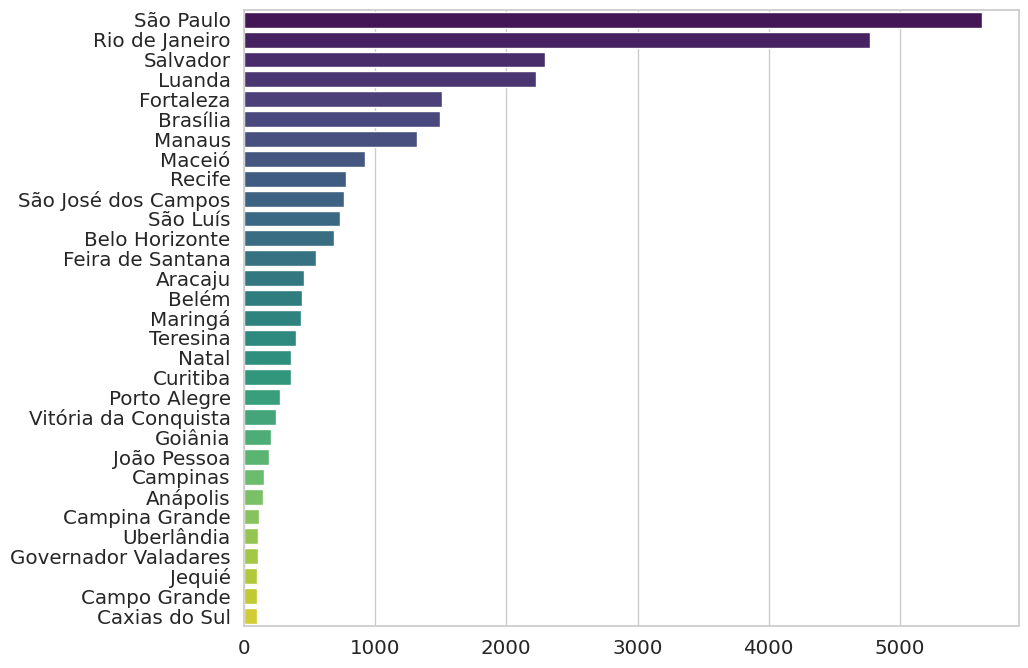

In [ ]:
# Crie o gráfico de barras horizontais
plt.figure(figsize=(10, 8))
sns.barplot(x='Visualizações', y='Nome da cidade', data=cidades_grafico, palette='viridis')

# Adicione rótulos e título ao gráfico
plt.xlabel('')
plt.ylabel('')
plt.title('')

# Exiba o gráfico
plt.show()

A maioria das visualizações vem do Brasil, mas vale destacar Luanda, na quarta posição como consumidora dos vídeos. A região sudeste e nordeste é também vista como a maior consumidora dos vídeos.
Percebe-se que do milhão de views, apenas cerca de 33 mil estão representadas pelo gráfico, o que leva a crer que muito do conteúdo é consumido em fontes externas ou tem origem desconhecida, como pode ser visto na análise de origem do tráfego, podendo ser até de pessoas não logadas no youtube.

##Gênero dos espectadores

In [ ]:
genero_view = pd.read_csv("genero_views.csv")
genero_view.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 5 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gênero do espectador               3 non-null      object 
 1   Visualizações (%)                  3 non-null      float64
 2   Duração média da visualização      3 non-null      object 
 3   Porcentagem visualizada média (%)  3 non-null      float64
 4   Tempo de exibição (horas) (%)      3 non-null      float64
dtypes: float64(3), object(2)
memory usage: 248.0+ bytes


In [ ]:
genero_view

,Gênero do espectador,Visualizações (%),Duração média da visualização,Porcentagem visualizada média (%),Tempo de exibição (horas) (%)
0,Feminino,61.66,0:03:54,40.87,61.44
1,Masculino,38.34,0:03:57,41.90,38.56
2,Especificado pelo usuário,0.00,0:04:18,55.08,0.00


Mais de 61% das pessoas que consomem o conteúdo do canal são do gênero feminino, porém os homens possuem uma porcentagem visualizada média 1% maior que as mulheres.

##Sobre as inscrições

In [ ]:
status_inscricao = pd.read_csv("status_inscrição.csv")
status_inscricao

,Status da inscrição,Visualizações,Tempo de exibição (horas),Duração média da visualização
0,Total,1468526,95496.3714,0:03:54
1,Não inscrito,1417124,92329.1633,0:03:54
2,Inscrito,51402,3167.2080,0:03:41


In [ ]:
(1417124/1468526)*100

96.49975553718491

Mais de 96% das visualizações vem de pessoas não inscritas no canal. Veremos de onde vem as inscrições

In [ ]:
origem_inscricao = pd.read_csv("origem_inscricao.csv")
origem_inscricao

,Origem da inscrição,Inscritos,Inscrições obtidas,Inscrições perdidas
0,Total,27774,32759,4985
1,Página de exibição do YouTube,26213,27012,799
2,Outro,1119,2010,891
3,Seu canal do YouTube,766,2248,1482
4,Pesquisa do YouTube,603,614,11
5,Recursos interativos,484,506,22
6,Feed dos Shorts,102,104,2
7,Outro canal do YouTube,88,89,1
8,Externas,8,10,2
9,Postagem da comunidade,4,4,0


A maioria dos inscritos vem da página de exibição do youtube, tendo o canal e a pesquisa do youtube também como meios significativos. A maior parte das desinscrições vem da lista de inscrições do canal e contas encerradas.

##Sobre os cards

In [ ]:
view_card = pd.read_csv("card_views.csv")
view_card

,Card,Cliques do teaser do card,Cliques em teaser por teaser de card mostrado (%),Cliques do card,Cliques por card mostrado (%)
0,Total,10200,1.88,3347,15.94
1,036eb29c-ae3e-4d25-a164-4a82df491779.5HcB0SSNLrE,2251,41.69,352,9.40
2,8b19b58a-8b77-4e61-bf2d-a76f010ef6ad.5HcB0SSNLrE,1946,1.89,917,24.36
3,78d11149-6c3a-41db-ac4c-6a13c10101e4.-jM9G7g4Z4g,464,2.05,65,7.07
4,bb856f50-112b-414d-adec-3e81d9aeb202.RYj8pJ5G0p8,416,7.56,382,92.49
...,...,...,...,...,...
314,b4a91757-88dc-4e1d-8693-b74b3418f175.NvMm6C2qCus,0,0.00,0,NaN
315,b8c88f37-6edd-4da5-974e-c80e4198f38a.h9SuL8-mYhc,0,0.00,0,NaN
316,ca38fc0b-1f6b-4404-84b7-9e20c5c0a05e.54xrZJQiCX8,0,0.00,0,0.00
317,d384eb45-fdbd-47b8-9c3f-4a725ee1d026.brk8hznhpno,0,0.00,0,0.00


O vídeo em card mais clicado se refere a figuras de linguagem, seguido por conotação e denotação.

In [ ]:
tipo_card = pd.read_csv("card_tipo.csv")
tipo_card

,Tipo de card,Cliques do teaser do card,Cliques em teaser por teaser de card mostrado (%),Cliques do card,Cliques por card mostrado (%)
0,Total,10200,1.88,3347,15.94
1,Vídeo,8082,2.17,2691,15.70
2,Playlist,1599,1.07,268,8.66
3,Enquete,421,7.55,384,91.43
4,Link,98,0.69,4,1.16


A grande maioria dos cliques em cards são para vídeos, seguido de playlists.

## Dados de compartilhamento

In [ ]:
dados_compart = pd.read_csv("dados_compartilhamento.csv")
dados_compart

,Serviço de compartilhamento,Compartilhamentos
0,Total,41581
1,WhatsApp,23847
2,Copiar para área de transferência,9678
3,Outros,6416
4,Gmail,343
5,Facebook,337
6,Compartilhar no WhatsApp Business,194
7,Diretamente pela caixa de diálogo de compartil...,162
8,Facebook Messenger,127
9,Embed,124


O whatsapp é onde os vídeos são mais compartilhados.

## Dispositivo em que a pessoa assiste

In [ ]:
tipo_dispositivo = pd.read_csv("tipo_dispositivo.csv")
tipo_dispositivo

,Tipo de dispositivo,Visualizações,Tempo de exibição (horas),Duração média da visualização
0,Total,1468526,95496.3714,0:03:54
1,Dispositivo móvel,857014,51220.6522,0:03:35
2,Computador,508168,36084.3706,0:04:15
3,TV,56635,5130.1422,0:05:26
4,Tablet,39167,2482.8860,0:03:48


In [ ]:
(857014/1468526)*100

58.35878969796926

In [ ]:
(508168/1468526)*100

34.60394981089882

Mais de 58% das views vem de dispositivos móveis, seguido do computador, que representa 34,6%. As demais visualizações são de TVs e tablets.

##Views ao longo do tempo

In [ ]:
data_views = pd.read_csv("view_data.csv")
data_views.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Data                           92 non-null     object 
 1   Visualizações                  92 non-null     int64  
 2   Tempo de exibição (horas)      92 non-null     float64
 3   Duração média da visualização  92 non-null     object 
 4   Receita estimada (USD)         82 non-null     float64
dtypes: float64(2), int64(1), object(2)
memory usage: 3.7+ KB


In [ ]:
data_views.head()

,Data,Visualizações,Tempo de exibição (horas),Duração média da visualização,Receita estimada (USD)
0,Total,1468526,95496.3714,0:03:54,1404.421
1,2023-12,11134,791.0265,0:04:15,8.169
2,2023-11,26850,1905.9733,0:04:15,26.242
3,2023-10,25822,1761.2078,0:04:05,21.679
4,2023-09,27996,1925.5687,0:04:07,22.644


In [ ]:
data_views = data_views.drop(index=0)

In [ ]:
data_views['Receita estimada (USD)'].fillna(0,inplace = True)

In [ ]:
data_views['Data'] = pd.to_datetime(data_views['Data'])


In [ ]:
data_views.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 1 to 91
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Data                           91 non-null     datetime64[ns]
 1   Visualizações                  91 non-null     int64         
 2   Tempo de exibição (horas)      91 non-null     float64       
 3   Duração média da visualização  91 non-null     object        
 4   Receita estimada (USD)         91 non-null     float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(1)
memory usage: 3.7+ KB


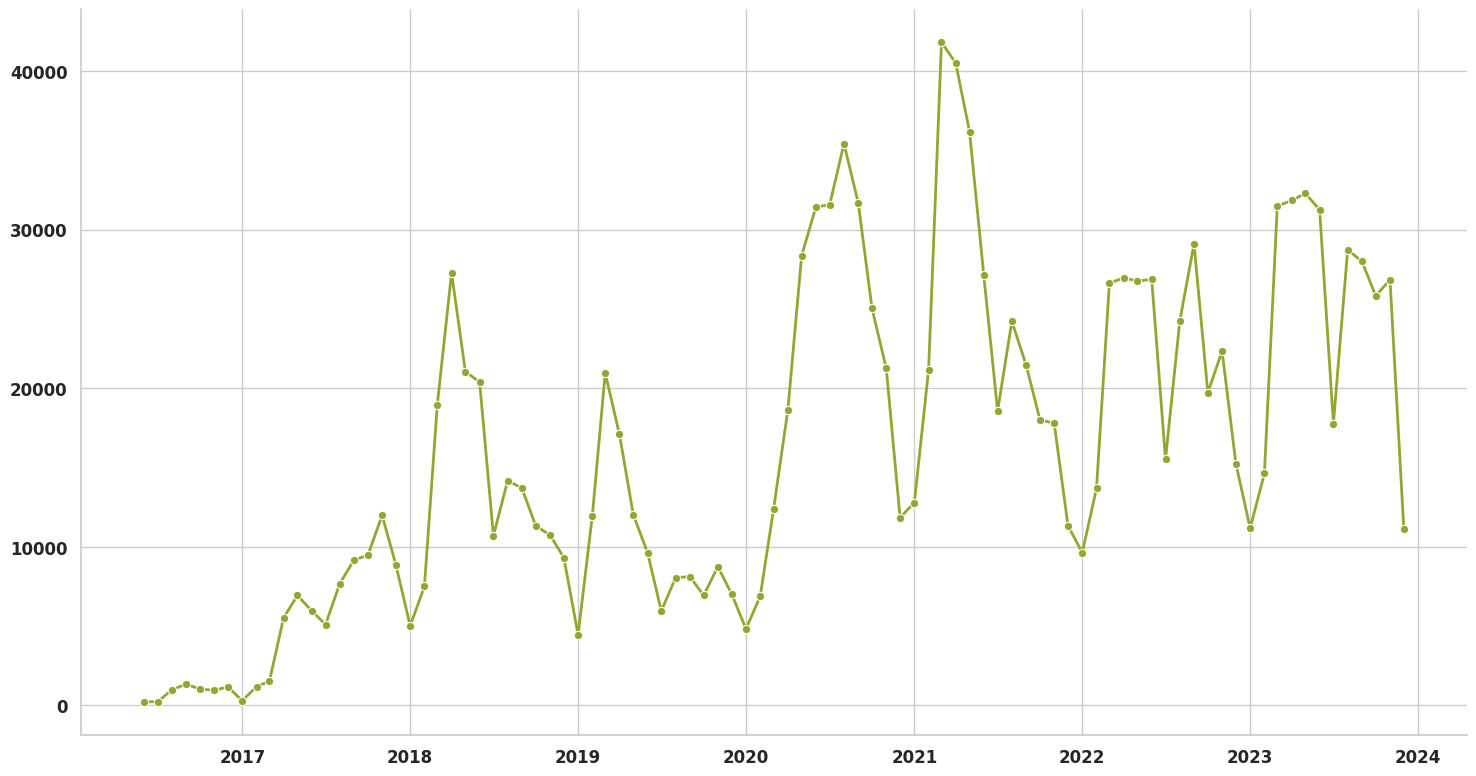

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configurar o tema do Seaborn (opcional, mas melhora a estética)
sns.set_theme(style='whitegrid', font_scale=1.2)

# Escolher uma paleta de cores elegante
color_palette = sns.color_palette("husl", 8)

# Crie o gráfico usando Seaborn
plt.figure(figsize=(15, 8))
line_plot = sns.lineplot(x='Data', y='Visualizações', data=data_views, marker='o', color=color_palette[2], linewidth=2)

# Aumentar o tamanho dos xticks e yticks e torná-los em negrito
plt.xticks(fontsize=12, weight='bold')
plt.yticks(fontsize=12, weight='bold')

# Adicione rótulos e título
plt.xlabel('', fontsize=14, weight='bold')
plt.ylabel('', fontsize=14, weight='bold')
plt.title('', fontsize=16, weight='bold')

# Remover bordas desnecessárias
sns.despine()

# Ajustar o layout para evitar cortes nos rótulos
plt.tight_layout()

# Exiba o gráfico
plt.show()

Veremos também como a receita se comporta ao longo do tempo.

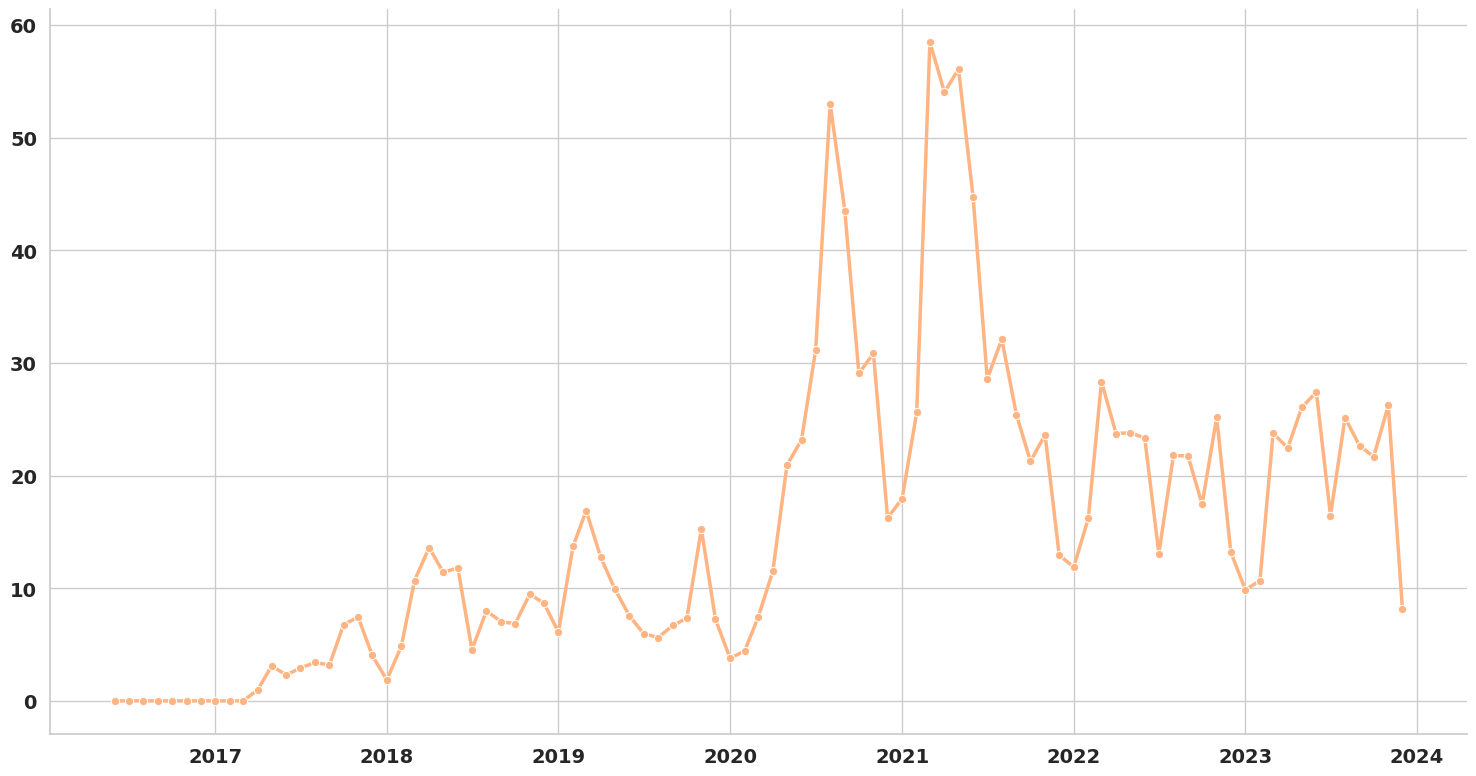

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configurar o tema do Seaborn (opcional, mas melhora a estética)
sns.set_theme(style='whitegrid', font_scale=1.2)

# Escolher uma paleta de cores elegante
color_palette = sns.color_palette("pastel")

# Crie o gráfico usando Seaborn com uma linha mais espessa (linewidth=2.5)
plt.figure(figsize=(15, 8))
line_plot = sns.lineplot(x='Data', y='Receita estimada (USD)', data=data_views, color=color_palette[1], marker='o', linewidth=2.5)

# Aumentar o tamanho dos xticks e yticks e torná-los em negrito
plt.xticks(fontsize=14, weight='bold')
plt.yticks(fontsize=14, weight='bold')

# Adicione rótulos e título
plt.xlabel('', fontsize=14, weight='bold')
plt.ylabel('', fontsize=14, weight='bold')
plt.title('', fontsize=16, weight='bold')

# Remover bordas desnecessárias
sns.despine()

# Ajustar o layout para evitar cortes nos rótulos
plt.tight_layout()

# Exiba o gráfico
plt.show()